## Question of Lab Assignment 1 
1. Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.
2. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.
3. Tentukan nilai silhoutte score dan DBI dari model.

# Question 1

## Step 1 - Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering 

## Step 2 - Load Dataset

In [4]:
df = pd.read_csv('CC_Customer_Dataset.csv')

df.info()
print("=======================")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Step 3 - Slicing the Data with All Possible Variables

In [5]:
# Slicing - Select Annual Income and Spending Score only
X = df.iloc[
    :, [2,3,4,5,6]
].values

## Step 4 - Visualize the Dendrogram to Determine the Cluster by each Threshold

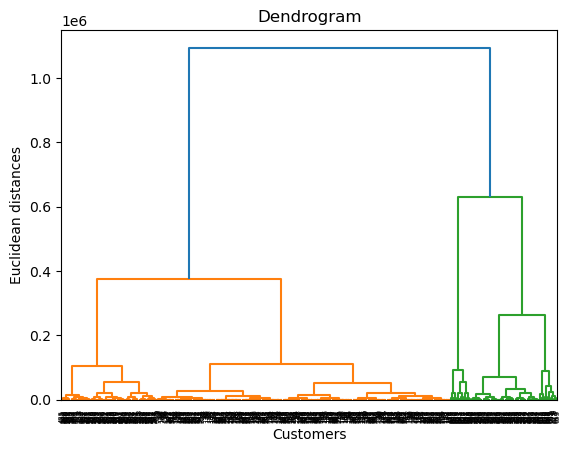

In [6]:
# Build dendogram using ward distance
# more info - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))

# Plot
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

Based on the dendrogram results, the optimal number of clusters appears to be 2, as indicated by the large distance before merging. However, this creates a very broad segmentation. Examining the dendrogram structure suggests that using 3 or 4 clusters could also be meaningful, as there are distinct groupings at lower heights. Therefore, I will explore a 3-cluster configuration to achieve more granular customer segmentation.

In [8]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

## Step 5 - Visualization of Clusters

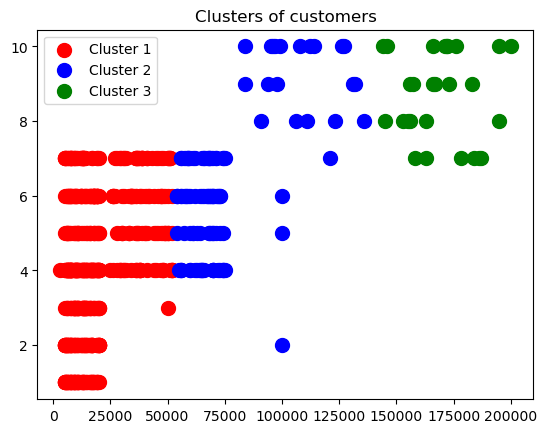

In [9]:
# Visualize The Result
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c="green", label="Cluster 3")
plt.title("Clusters of customers")
plt.legend()
plt.show()

## Step 6 - Evaluation Cluster Results using Silhouette Score

In [10]:
# Evaluate the clustering using silhouette coefficient
silhouette_avg = silhouette_score(X, y_hc)
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.6811232268244817


# Question 2

## Step 1 - Slicing Data for Two Variables

In [11]:
# Slicing only the two required features
X2 = df[["Avg_Credit_Limit", "Total_Credit_Cards"]].values

## Step 2 - Fit Agglomerative Clustering Model

In [12]:
# Fit Agglomerative Clustering using only the two features
hc2 = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
y_hc2 = hc2.fit_predict(X2)

## Step 3 - Visualize The Clusters with a Scatterplot 

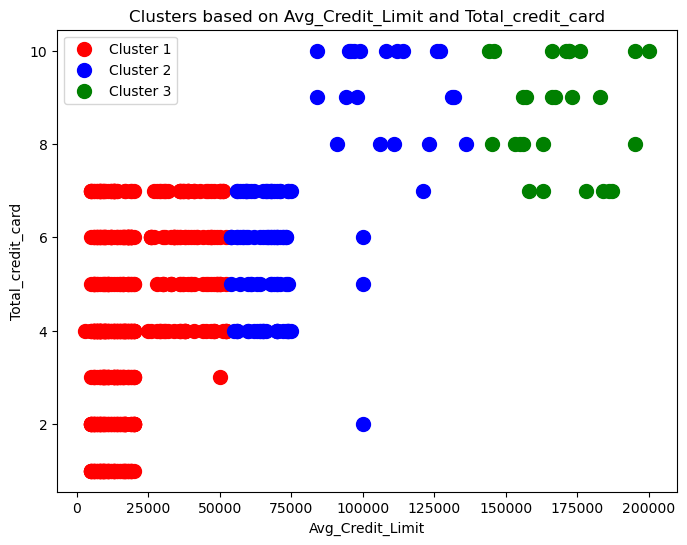

In [13]:
# Scatterplot showing clusters
plt.figure(figsize=(8,6))
plt.scatter(X2[y_hc2 == 0, 0], X2[y_hc2 == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X2[y_hc2 == 1, 0], X2[y_hc2 == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X2[y_hc2 == 2, 0], X2[y_hc2 == 2, 1], s=100, c="green", label="Cluster 3")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_credit_card")
plt.title("Clusters based on Avg_Credit_Limit and Total_credit_card")
plt.legend()
plt.show()

## Step 4 - Evaluation Cluster Results using Silhouette Score

In [14]:
# Evaluate clustering quality using silhouette score
silhouette_2d = silhouette_score(X2, y_hc2)
print(f"Silhouette Score (2 features): {silhouette_2d:.3f}")

Silhouette Score (2 features): 0.681
